ChEn-3170: Computational Methods in Chemical Engineering Spring 2020 UMass Lowell; Prof. V. F. de Almeida **23Mar20**

# 11. Modified Arrhenius Rate Constant Data Fitting
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
$

---
## Table of Contents
* [Introduction](#intro)
* [Modified Arrhenius Data Fitting](#madf)
* [Experimental Data (10 points)](#ed10)
 * [Linear System](#ls10)
 * [LS Data Fitting](#lsdf10)
 * [LS Residual](#lsr10)
* [Experimental Data (30 points)](#ed30)
 * [Linear System](#ls30)
 * [LS Data Fitting](#lsdf30)
 * [LS Residual](#lsr30)
* [Experimental Data (90 points)](#ed90)
 * [Linear System](#ls90)
 * [LS Data Fitting](#lsdf90)
 * [LS Residual](#lsr90)
* [Results Comparison](#res)
---

## Introduction<a id="intro"></a>
The background theory for this notebook can be found in Notebook 10.

## Modified Arrhenius Data Fitting<a id="madf"></a>
The modified Arrhenius expression includes an additional term dependent on the power of $T$, namely

\begin{equation*}
k(T) = k_0 \, T^{\alpha} e^{-\frac{E_\text{a}}{R\,T}}.
\end{equation*}

In terms of the coldness variable $\beta$, it reads

\begin{equation*}
k(\beta) = k_0 \, \bigl(R\,\beta\bigr)^{-\alpha} e^{-\beta\,E_\text{a}}.
\end{equation*}

The pre-exponential factor (frequency parameter), $k_0$, the power-law exponent $\alpha$, and the energy of activation, $E_\text{a}$, are the sought parameters in this expression. The linear least squares method for finding the optimal values of $k_0$, $\alpha$, and $E_\text{a}$ can be used in a similar way as in Notebook 10. The purpose of this notebook is to sketch how to go about computing these parameters. Likewise the Arrhenius expression the modified version needs to be transformed into a linear form. After this step, the analysis follows very closely the 
calculations done in Notebook 10.

## Experimental Data (10 points)<a id="ed10"></a>
Data will be provided for exercises as ASCII files in the `data/` directory of the course [repository](https://github.com/dpploy/chen-3170/tree/master/notebooks/data). The data is organized in two columns of $T$ versus $k$. For example `data/modified-k_x_T_10pts.dat`:

R = 8.314 [J/(mol.K)]
m =  10
T = [373.15 402.93 432.71 462.48 492.26 522.04 551.82 581.59 611.37 641.15]
k = [ 9.63 10.35 10.31 11.12 11.18 11.5  11.6  11.64 12.15 12.41]


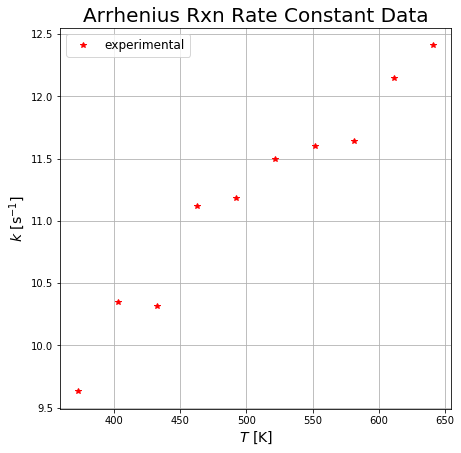

In [10]:
'''Read and plot experimental data'''

from chen_3170.help import read_arrhenius_experimental_data

import numpy as np
(r_cte, r_cte_units, n_pts, temp, k_cte) = read_arrhenius_experimental_data('data/modified-k_x_T_10pts.dat')
        
print('R = %4.3f %s'%(r_cte,r_cte_units))
print('m = ',n_pts)
np.set_printoptions(precision=2)
print('T =',temp)
print('k =', k_cte)

from chen_3170.help import plot_arrhenius_experimental_data

plot_arrhenius_experimental_data(temp, k_cte)

### Linear System<a id="ls10"></a>

In [5]:
'''Build the matrix system'''

try:    
    from chen_3170.toolkit import build_mod_arrhenius_matrix   
except ModuleNotFoundError:
    assert False, 'You need to provide your own build_mod_arrhenius_matrix function here. Bailing out.'
    
(a_mtrx, b_vec) = build_mod_arrhenius_matrix( r_cte, temp, k_cte )

print('a_mtrx =\n',a_mtrx)
print('b_vec =',b_vec)

#from chen_3170 import toolkit
#print('rank(A) =',toolkit.matrix_rank(a_mtrx))

try:    
    from chen_3170.toolkit import matrix_rank   
except ModuleNotFoundError:
    assert False, 'You need to provide your own matrix_rank function here. Bailing out.'

print('my rank(A) =',matrix_rank(a_mtrx))
print('np.linalg rank(A) =',np.linalg.matrix_rank(a_mtrx))

a_mtrx =
 [[ 1.00e+00 -3.22e-04  5.92e+00]
 [ 1.00e+00 -2.99e-04  6.00e+00]
 [ 1.00e+00 -2.78e-04  6.07e+00]
 [ 1.00e+00 -2.60e-04  6.14e+00]
 [ 1.00e+00 -2.44e-04  6.20e+00]
 [ 1.00e+00 -2.30e-04  6.26e+00]
 [ 1.00e+00 -2.18e-04  6.31e+00]
 [ 1.00e+00 -2.07e-04  6.37e+00]
 [ 1.00e+00 -1.97e-04  6.42e+00]
 [ 1.00e+00 -1.88e-04  6.46e+00]]
b_vec = [2.27 2.34 2.33 2.41 2.41 2.44 2.45 2.45 2.5  2.52]
my rank(A) = 3
np.linalg rank(A) = 3


### LS Data Fitting<a id="lsdf10"></a>

Let's build the LS normal equations and solve

\begin{equation*}
\Amtrx^\top\Amtrx\,\xvec_\text{LS}  = \Amtrx^\top\,\bvec .
\end{equation*}

The least squares solution $\xvec_\text{LS}$ gives the optimal values of the coefficients $\ln k_0$ and $E_\text{a}$ for the Arrhenius fit.

In [18]:
'''Build and solve the normal equations'''

#x_vec = toolkit.solve( a_mtrx.transpose()@a_mtrx, a_mtrx.transpose()@b_vec )
try:    
    from chen_3170.toolkit import solve   
except ModuleNotFoundError:
    assert False, 'You need to provide your own solve function here. Bailing out.'
    
x_vec = solve( a_mtrx.transpose()@a_mtrx, a_mtrx.transpose()@b_vec )    
assert np.linalg.norm(x_vec-np.linalg.solve( a_mtrx.transpose()@a_mtrx, a_mtrx.transpose()@b_vec )) < 1e-6

np.set_printoptions(precision=3,threshold=100,edgeitems=3)
print('x_vec =',x_vec)

import math
k_0      = math.exp(x_vec[0])
energy_a = x_vec[1]
alpha    = x_vec[2]

print('k_0   = %8.5e [1/s]'%k_0)
print('E_a   = %8.5e [J/mol]'%energy_a)
print('alpha = %8.5e []'%alpha)

x_vec = [ 3.894e+00  2.320e+03 -1.473e-01]
k_0   = 4.91257e+01 [1/s]
E_a   = 2.31978e+03 [J/mol]
alpha = -1.47323e-01 []


In [19]:
'''Plot the fit in the transformed plane'''

plot_fit_transformed(r_cte, temp, k_cte, k_0, energy_a, alpha)

NameError: name 'plot_fit_transformed' is not defined

In [20]:
'''Plot the fit in the Cartesian plane'''

plot_fit_cartesian(r_cte, temp, k_cte, k_0, energy_a, alpha)

NameError: name 'plot_fit_cartesian' is not defined

### LS Residual<a id="lsr10"></a>

Let's calculate the residual

\begin{equation*}
\rvec = \bvec - \Amtrx\,\xvec_\text{LS} 
\end{equation*}

and its norm squared at the $\xvec$ point, that is, the objective function of the LS problem:

\begin{equation*}
\phi(\xvec_\text{LS}) = \norm{\rvec}^2.
\end{equation*}

Let's show graphically that 

\begin{equation*}
\phi(\xvec_\text{LS}) = \min\limits_{\xvec} \norm{\rvec}^2 .
\end{equation*}

Information on `matplotlib` plots in 3D is found [here](https://matplotlib.org/tutorials/toolkits/mplot3d.html#sphx-glr-tutorials-toolkits-mplot3d-py).

In [ ]:
'''Examining the residual'''

r_vec = b_vec - a_mtrx @ x_vec
phi_ls = np.linalg.norm(r_vec)**2

print('phi(x_LS)       = %8.3e'%phi_ls)
print('sqrt(phi(x_LS)) = %8.3e'%math.sqrt(phi_ls))
print('goodness of fit = %8.3e'%math.sqrt(phi_ls/n_pts))

In [ ]:
'''Function: plot the objective function around the minimum'''

def plot_objective_function(a_mtrx, x_vec, b_vec):
    
    import numpy as np
    
    # create the objective function array
    n_plot_pts = 150
    ln_k_0_pts = np.linspace( 0.9*x_vec[0], x_vec[0]*1.1, n_plot_pts )
    energy_pts = np.linspace( 0.9*x_vec[1], x_vec[1]*1.1, n_plot_pts )
    alpha      = x_vec[2]
    phi = np.zeros((n_plot_pts,n_plot_pts))
    i = -1
    for ln_k_0 in ln_k_0_pts:
        i += 1
        j = -1
        for e_a in energy_pts:
            j += 1
            res = b_vec - a_mtrx @ np.array([ln_k_0,e_a,alpha])
            phi[i,j] = np.dot(res,res);

    # 3D-plot the surface of the objective function
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib import cm
    from mpl_toolkits.mplot3d import Axes3D

    #fig = plt.figure(3,figsize=(8, 8))
    #ax = Axes3D(fig)
    #ax.plot_surface(ln_k_0_pts, energy_pts, np.sqrt(phi), rstride=1, cstride=1, cmap=cm.viridis)
    #ax.view_init(azim=10)

    #ax.set_xlabel(r'$\ln k_0$ [ ]',fontsize=16)
    #ax.set_ylabel(r'$E_a$ [J/mol]',fontsize=16)
    #ax.set_zlabel(r'$\phi$',fontsize=16)

    #plt.show()
    
    # plot the contour curves of the objective function
    from matplotlib import ticker, cm
    fig, ax = plt.subplots(figsize=(8, 8))
    delta = np.min(np.min(phi))/100.0 * 1.5 # 0.06% variation near the minimum
    cv = np.linspace(np.min(np.min(phi))+delta,np.max(np.max(phi)),10);
    cs = ax.contour(ln_k_0_pts, energy_pts, phi, cv)
    xpos = x_vec[0]
    ypos = x_vec[1]
    plt.text(xpos,ypos,r'* ($\ln k_0$=%5.2e, $E_a$=%5.2e)'%(x_vec[0],x_vec[1]),color='r',fontsize=14);
    plt.xlabel(r'$\ln k_0$ []',fontsize=14)
    plt.ylabel(r'$E_a$ [J/mol]',fontsize=14)

    plt.show()
    return

In [ ]:
'''Plot the objective function around the minimum'''

plot_objective_function(a_mtrx, x_vec, b_vec)

## Experimental Data (30 points)<a id="ed30"></a>
Data will be provided for exercises as ASCII files in the `data/` directory of the course [repository](https://github.com/dpploy/chen-3170/data). The data is organized in two columns of $T$ versus $k$. For example `data/modified-k_x_T_30pts.dat`:

In [ ]:
'''Read and plot experimental data'''

from chen_3170.help import read_arrhenius_experimental_data

import numpy as np
(r_cte, r_cte_units, n_pts, temp, k_cte) = read_arrhenius_experimental_data('data/modified-k_x_T_30pts.dat')
        
print('R = %4.3f %s'%(r_cte,r_cte_units))
print('m = ',n_pts)
np.set_printoptions(precision=2)
print('T =',temp)
print('k =', k_cte)

from chen_3170.help import plot_arrhenius_experimental_data

plot_arrhenius_experimental_data(temp, k_cte)

### Linear System<a id="ls30"></a>

In [ ]:
'''Build the matrix system'''

(a_mtrx, b_vec) = build_linear_system( r_cte, temp, k_cte )

#print('a_mtrx =\n',a_mtrx)
#print('b_vec =',b_vec)

#from chen_3170 import toolkit 
#print('rank(A) =',toolkit.matrix_rank(a_mtrx))

print('rank(A) =',np.linalg.matrix_rank(a_mtrx))

### LS Data Fitting<a id="lsdf30"></a>

In [ ]:
'''Build and solve the normal equations'''

#x_vec = toolkit.solve( a_mtrx.transpose()@a_mtrx, a_mtrx.transpose()@b_vec )
x_vec = np.linalg.solve( a_mtrx.transpose()@a_mtrx, a_mtrx.transpose()@b_vec )
print('x_vec =',x_vec)

import math
k_0      = math.exp(x_vec[0])
energy_a = x_vec[1]
alpha    = x_vec[2]

print('k_0   = %8.5e [1/s]'%k_0)
print('E_a   = %8.5e [J/mol]'%energy_a)
print('alpha = %8.5e []'%alpha)

In [ ]:
'''Plot the fit in the transformed plane'''

plot_fit_transformed(r_cte, temp, k_cte, k_0, energy_a, alpha)

In [ ]:
'''Plot the fit in the Cartesian plane'''

plot_fit_cartesian(r_cte, temp, k_cte, k_0, energy_a, alpha)

### LS Residual<a id="lsr30"></a>

In [ ]:
'''Examining the residual'''

r_vec = b_vec - a_mtrx @ x_vec
phi_ls = np.linalg.norm(r_vec)**2

print('phi(x_LS)       = %8.3e'%phi_ls)
print('sqrt(phi(x_LS)) = %8.3e'%math.sqrt(phi_ls))
print('goodness of fit = %8.3e'%math.sqrt(phi_ls/n_pts))

In [ ]:
'''Plot the objective function around the minimum'''

plot_objective_function(a_mtrx, x_vec, b_vec)

## Experimental Data (90 points)<a id="ed90"></a>
Data will be provided for exercises as ASCII files in the `data/` directory of the course [repository](https://github.com/dpploy/chen-3170/data). The data is organized in two columns of $T$ versus $k$. For example `data/modified-k_x_T_90pts.dat`.

In [ ]:
'''Read and plot experimental data'''

from chen_3170.help import read_arrhenius_experimental_data

import numpy as np
(r_cte, r_cte_units, n_pts, temp, k_cte) = read_arrhenius_experimental_data('data/modified-k_x_T_90pts.dat')
        
print('R = %4.3f %s'%(r_cte,r_cte_units))
print('m = ',n_pts)
np.set_printoptions(precision=2)
print('T =',temp)
print('k =', k_cte)

from chen_3170.help import plot_arrhenius_experimental_data

plot_arrhenius_experimental_data(temp, k_cte)

### Linear System<a id="ls90"></a>

In [ ]:
'''Build the matrix system'''

(a_mtrx, b_vec) = build_linear_system( r_cte, temp, k_cte )

#print('a_mtrx =\n',a_mtrx)
#print('b_vec =',b_vec)

#from chen_3170 import toolkit 
#print('rank(A) =',toolkit.matrix_rank(a_mtrx))

print('rank(A) =',np.linalg.matrix_rank(a_mtrx))

### LS Data Fitting<a id="lsdf90"></a>

In [ ]:
'''Build and solve the normal equations'''

#x_vec = toolkit.solve( a_mtrx.transpose()@a_mtrx, a_mtrx.transpose()@b_vec )
x_vec = np.linalg.solve( a_mtrx.transpose()@a_mtrx, a_mtrx.transpose()@b_vec )
print('x_vec =',x_vec)

import math
k_0      = math.exp(x_vec[0])
energy_a = x_vec[1]
alpha    = x_vec[2]

print('k_0   = %8.5e [1/s]'%k_0)
print('E_a   = %8.5e [J/mol]'%energy_a)
print('alpha = %8.5e []'%alpha)

In [ ]:
'''Plot the fit in the transformed plane'''

plot_fit_transformed(r_cte, temp, k_cte, k_0, energy_a, alpha)

In [ ]:
'''Plot the fit in the Cartesian plane'''

plot_fit_cartesian(r_cte, temp, k_cte, k_0, energy_a, alpha)

### LS Residual<a id="lsr90"></a>

In [ ]:
'''Examining the residual'''

r_vec = b_vec - a_mtrx @ x_vec
phi_ls = np.linalg.norm(r_vec)**2

print('phi(x_LS)       = %8.3e'%phi_ls)
print('sqrt(phi(x_LS)) = %8.3e'%math.sqrt(phi_ls))
print('goodness of fit = %8.3e'%math.sqrt(phi_ls/n_pts))

In [ ]:
'''Plot the objective function around the minimum'''

plot_objective_function(a_mtrx, x_vec, b_vec)

## Results Comparison<a id="res"></a>

|       Parameters                                |  10 pts  |  30 pts  | 90 pts   |
| ------------------------------------- | -------- | -------  | -------- |
| Pre-exponential factor, $k_0$, 1/s    | 4.91e+01 | 2.14e+00 | 1.39     |
| Energy of activation, $E_a$, J/mol    | 2.32e+03 | 4.55e+02 | 2.70e+02 |
| Power law exponent, $\alpha$          |-1.47e-01 | 2.82e-01 | 3.45e-01 |
| Residual norm                         | 4.59e-02 | 9.51e-02 | 1.75e-01 |
| Goodness of fit                       | 1.45e-02 | 1.74e-02 | 1.84e-02 |